In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# Step 2: Load your dataset (make sure the file is in your working folder)
data = pd.read_csv("Crop_recommendation.csv")

In [3]:
# Step 3: Split features and target
X = data.drop('label', axis=1)  # all columns except 'label'
y = data['label']               # the target column

In [4]:
# Step 4: Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Step 5: Create and train the model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

In [6]:
# Step 6: Make predictions
y_pred = model.predict(X_test)

In [7]:
# Step 7: Evaluate accuracy
print(" Logistic Regression Model Accuracy:", accuracy_score(y_test, y_pred)*100)

 Logistic Regression Model Accuracy: 94.77272727272728


In [8]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [9]:
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

In [10]:
print(" Training Accuracy:", train_accuracy*100)
print(" Testing Accuracy:", test_accuracy*100)

 Training Accuracy: 97.89772727272728
 Testing Accuracy: 94.77272727272728


In [16]:
# predict for test set
y_pred = model.predict(X_test)

# show actual and predicted values
result = pd.DataFrame({
    'actual_label': y_test,
    'predicted_label': y_pred
})

pd.set_option('display.max_rows', None)
print(result)



     actual_label predicted_label
1451    muskmelon       muskmelon
1334   watermelon      watermelon
1761       papaya          papaya
1735       papaya          papaya
1576        apple           apple
1110        mango           mango
1594        apple           apple
530     mothbeans       mothbeans
651      mungbean        mungbean
819        lentil          lentil
771     blackgram       blackgram
1878      coconut         coconut
915   pomegranate     pomegranate
2015         jute            jute
1876      coconut         coconut
937   pomegranate     pomegranate
1562        apple           apple
179         maize          cotton
1723       papaya          papaya
1472    muskmelon       muskmelon
2167       coffee          coffee
1716       papaya          papaya
1646       orange          orange
1708       papaya          papaya
251      chickpea        chickpea
2009         jute            jute
602      mungbean        mungbean
1611       orange          orange
486    pigeonp

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

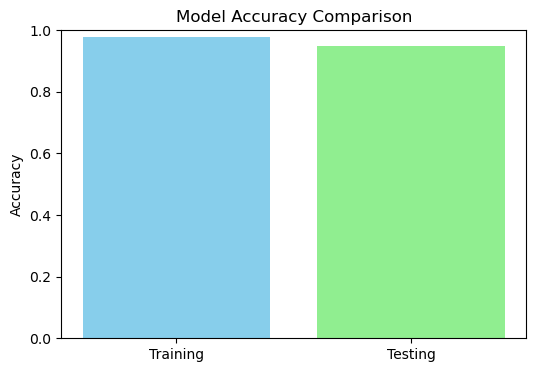

In [18]:
plt.figure(figsize=(6,4))
plt.bar(['Training', 'Testing'], [train_accuracy, test_accuracy], color=['skyblue', 'lightgreen'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

<Figure size 1000x1000 with 0 Axes>

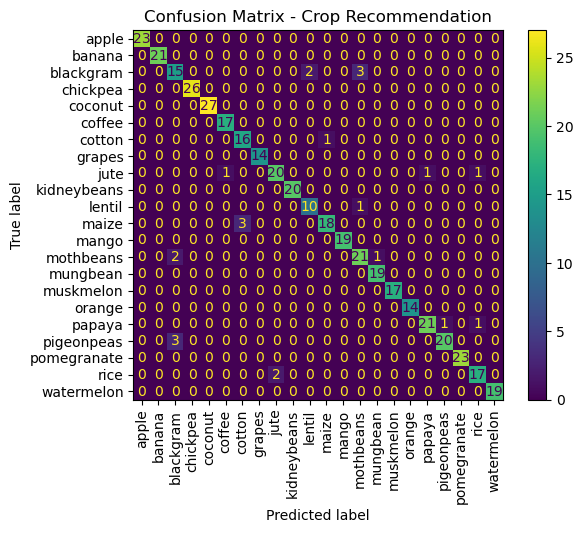

In [19]:
# Step 8: Confusion Matrix for Test Data
cm = confusion_matrix(y_test, y_pred_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
plt.figure(figsize=(10,10))
disp.plot(cmap='viridis', xticks_rotation=90)
plt.title('Confusion Matrix - Crop Recommendation')
plt.show()

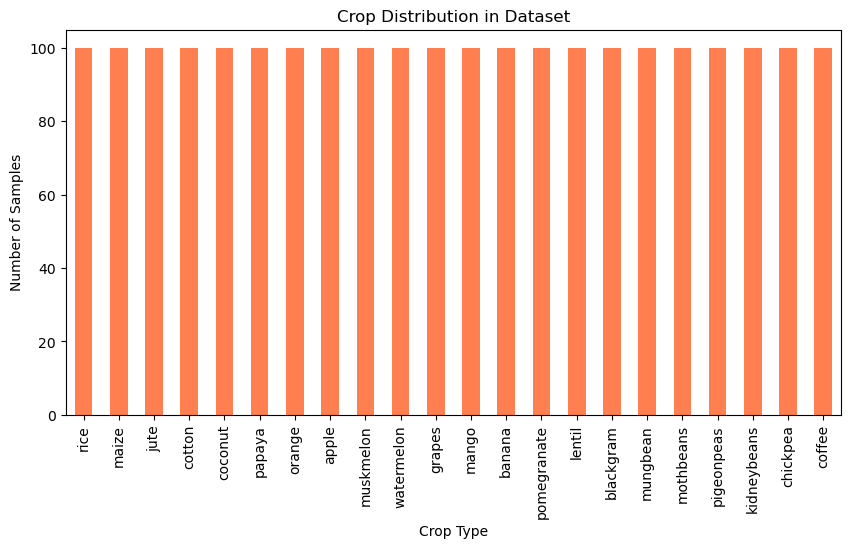

In [20]:
# Step 9: Distribution of Crops in Dataset
plt.figure(figsize=(10,5))
data['label'].value_counts().plot(kind='bar', color='coral')
plt.title('Crop Distribution in Dataset')
plt.ylabel('Number of Samples')
plt.xlabel('Crop Type')
plt.xticks(rotation=90)
plt.show()